In [134]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal

#Define variables
mean1 = [0.4, 0.8] #μ1
mean2 = [1.5, 2.7] #μ2

cov = [[1.5, 0],[0, 0.8]] #Σ


Part A

Question 1

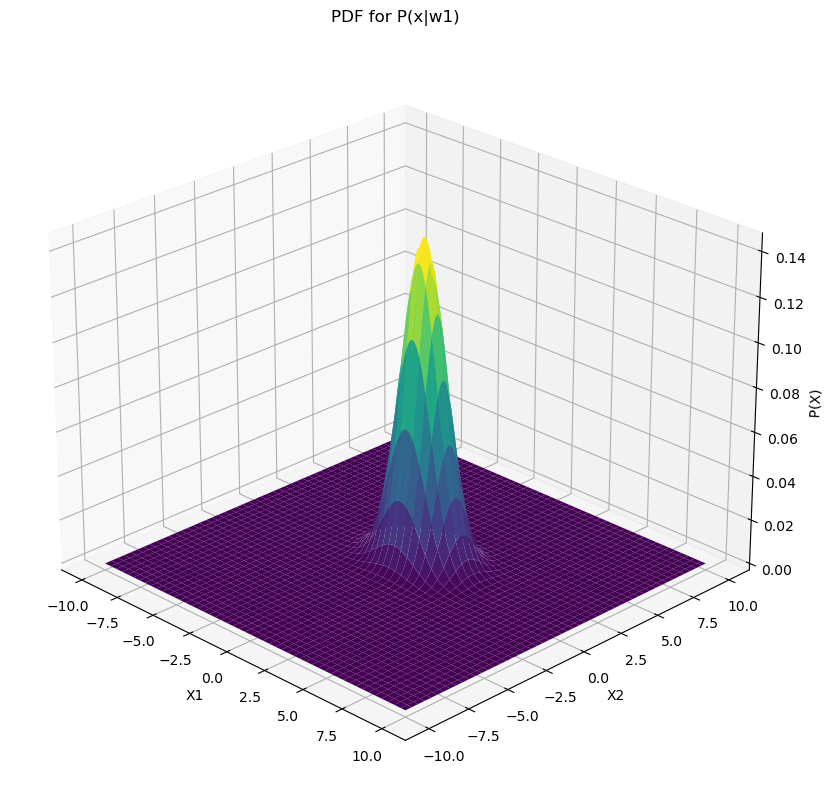

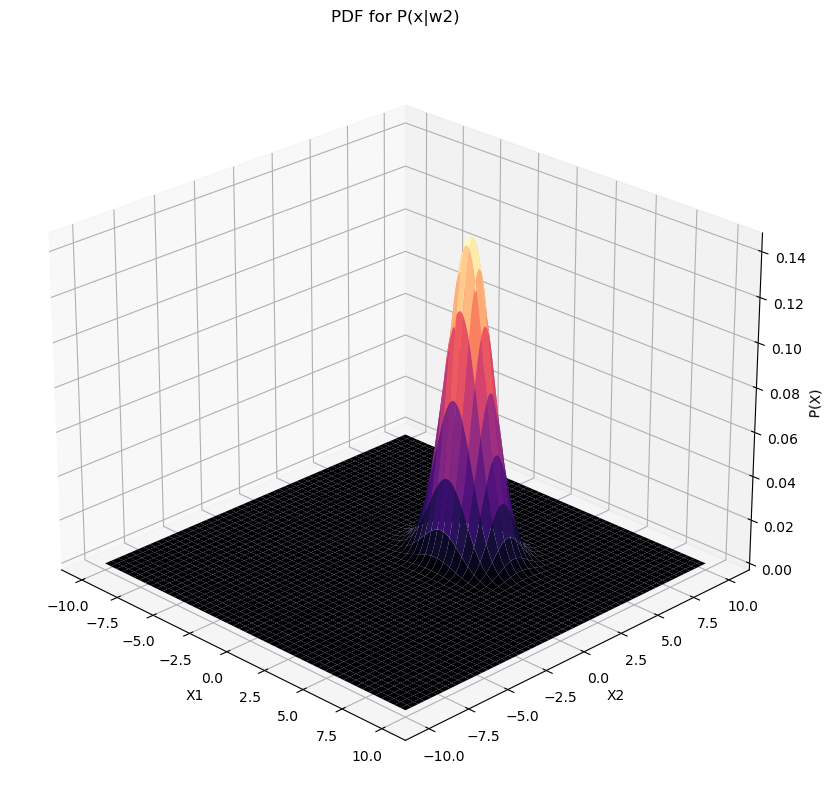

In [135]:
#Calculate our X1 and X2 vector values
X_1=np.linspace(-10,10,200)
X_2=np.linspace(-10,10,200)

#Create board from X1 and X2 values
X_1,X_2=np.meshgrid(X_1,X_2)
data=np.empty(X_1.shape + (2,))
data[:,:,0]=X_1
data[:,:,1]=X_2

#Calculate probability functions for μ1 and μ2
P_1=multivariate_normal.pdf(data,mean1,cov)
P_2=multivariate_normal.pdf(data,mean2,cov)
    
#Create 3D surface plot for P(x|w1)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P_1, cmap='viridis', linewidth=0)
ax.view_init(elev=25, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(x|w1)')
plt.show()

#Create 3D surface plot for P(x|w2)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P_2, cmap='magma', linewidth=0)
ax.view_init(elev=25, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(x|w2)')
plt.show()

As we can see in the above diagrams, each probability density function has its maxumum point at where it's mean value is.
μ1 for P(x|w1) and μ2 for P(x|w2).
Now, let's plot them in the same diagram with different elevation to better see the maximum point of each pdf.

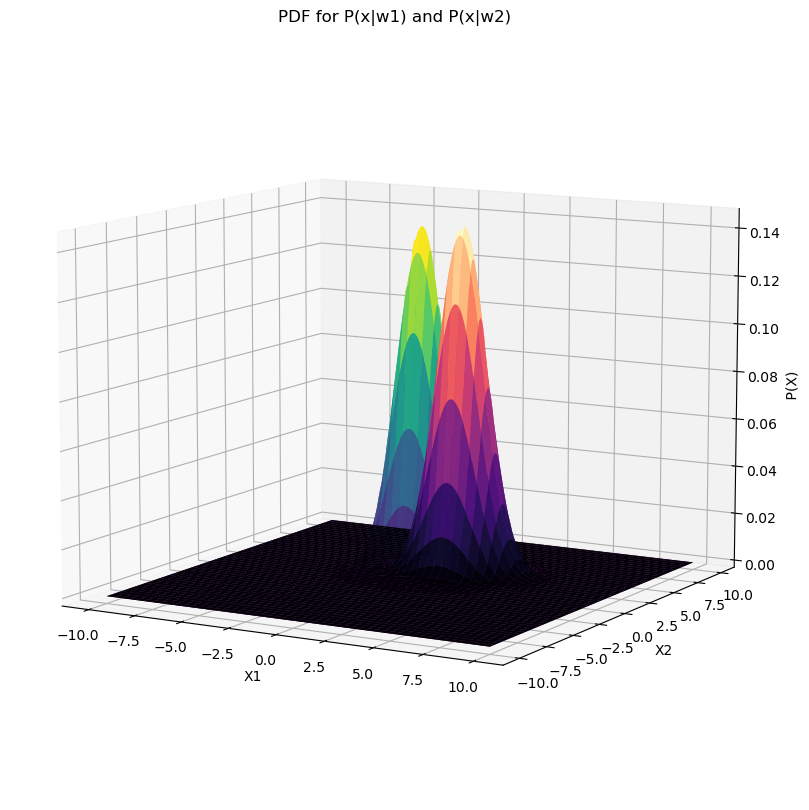

In [136]:

#Create 3D surface plot for P(x|w1) and P(x|w2)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P_1, cmap='viridis', linewidth=0)
ax.plot_surface(X_1, X_2, P_2, cmap='magma', linewidth=0)
ax.view_init(elev=10, azim=-60)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(x|w1) and P(x|w2)')
plt.show()

Question 2

In [137]:
#Prior possibilities
P1_prior=0.95
P2_prior=0.05

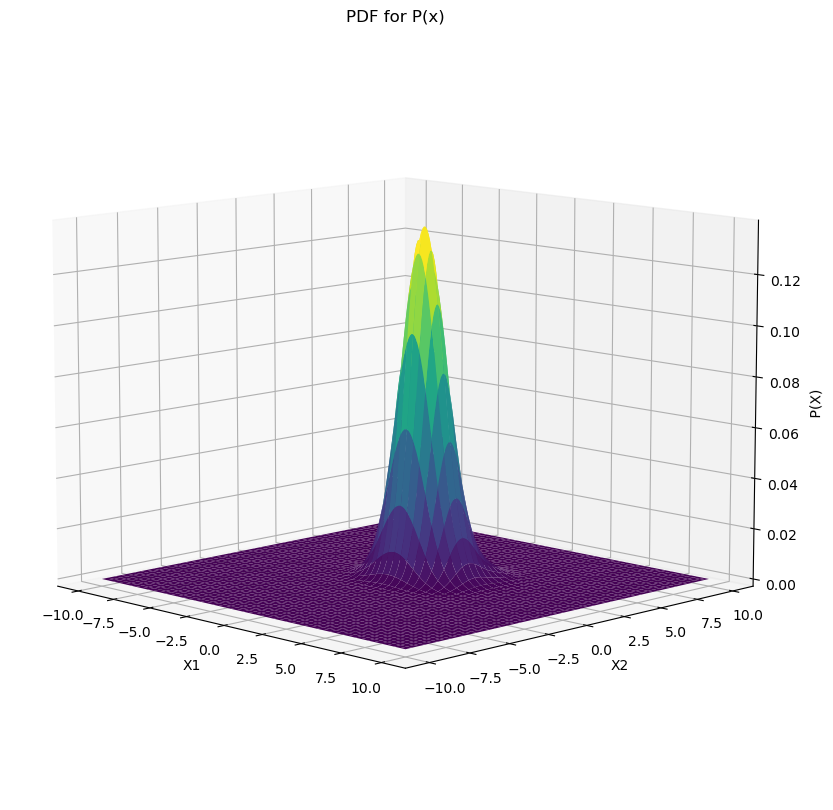

In [138]:
#Calculate total probability distribution from theorem type    
P_total=(P_1*P1_prior)+(P_2*P2_prior)
    
#Create 3D surface plot for P(x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P_total, cmap='viridis', linewidth=0)
ax.view_init(elev=10, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(x)')
plt.show()

As we can see in the above diagram, the total probability distribution includes most of the  P(x|w1) points, because the first class(ω1) a priori possibility is far greater than the second class(ω2).

Question 3

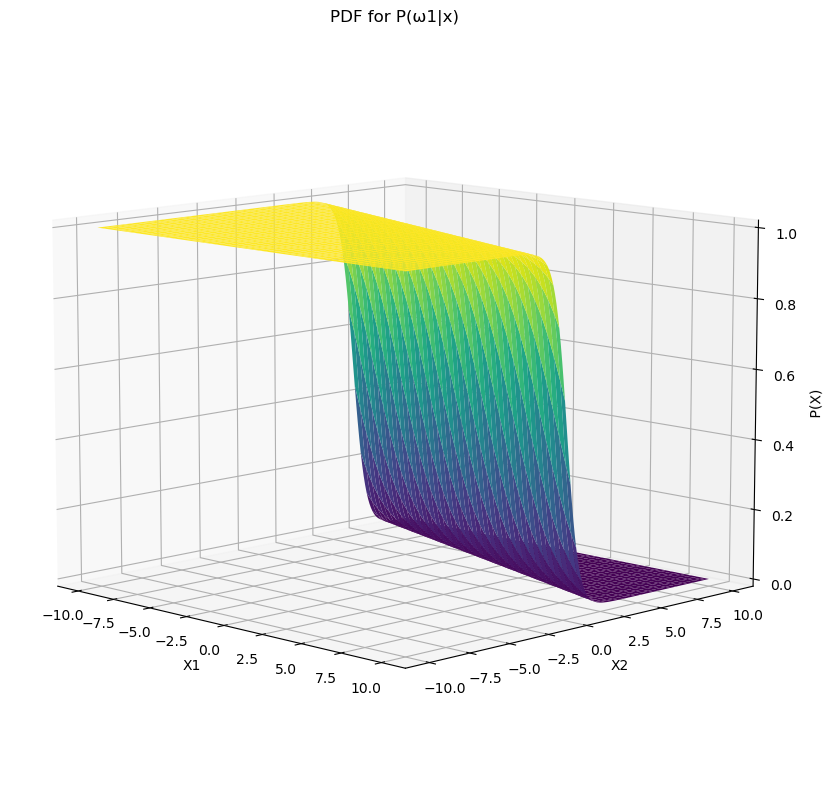

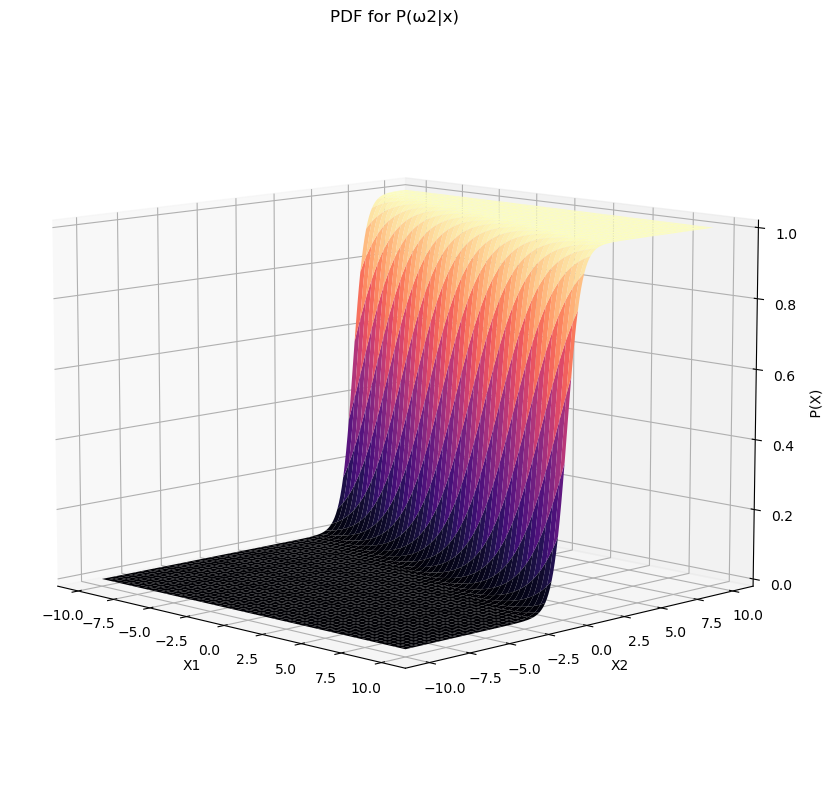

In [139]:
#Calculate posterior probability for both of our classes based on Bayes theorem
P1_posterior=(P_1*P1_prior)/P_total
P2_posterior=(P_2*P2_prior)/P_total

#Create 3D surface plot for P(ω1|x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P1_posterior, cmap='viridis', linewidth=0)
ax.view_init(elev=10, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(ω1|x)')
plt.show()

#Create 3D surface plot for P(ω2|x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P2_posterior, cmap='magma', linewidth=0)
ax.view_init(elev=10, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(ω2|x)')
plt.show()

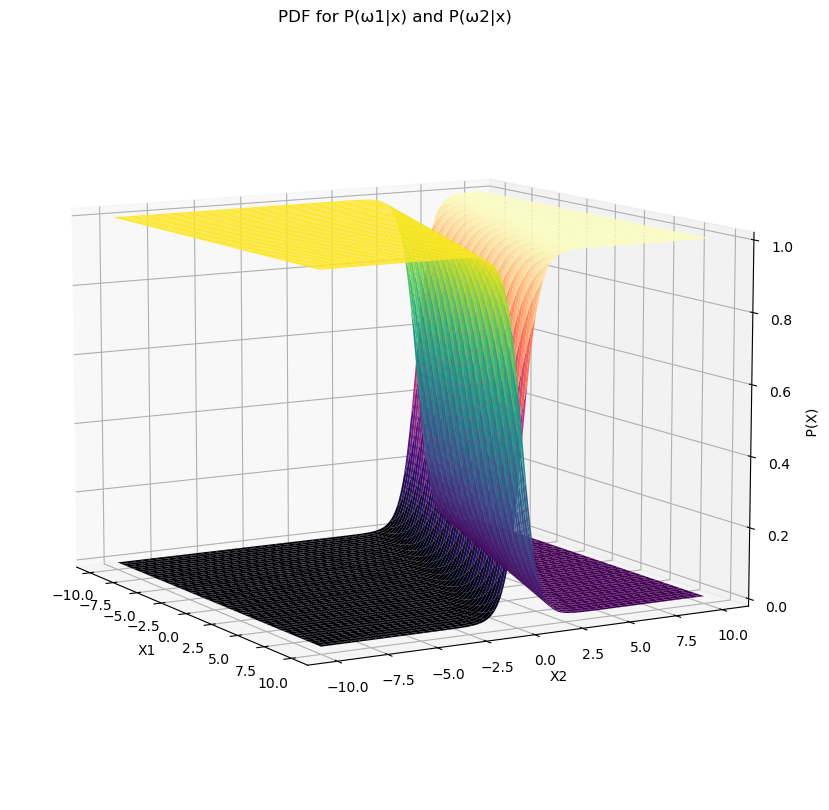

In [140]:
#Now let's plot them together for a better comparison.
#Create 3D surface plot for P(ω1|x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P1_posterior, cmap='viridis', linewidth=0)
ax.plot_surface(X_1, X_2, P2_posterior, cmap='magma', linewidth=0)
ax.view_init(elev=10, azim=-30)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(ω1|x) and P(ω2|x)')
plt.show()

In the above diagram, we can clearly see the point at which the PDF's intersect with each other. Before this point, the a posteriori probability that the variable x belong in class ω1 is far higher than the possibility for it to belong to class ω2, but after the intersection point we can observe that the opposite case happens.

Question 4

In [141]:
errors=[]
array=np.array(data)
for i in array:
    prob1 = (multivariate_normal(mean1, cov).pdf(i))*P1_prior
    prob2 = (multivariate_normal(mean2, cov).pdf(i))*P2_prior
    if(prob1<prob2).all():
        errors.append(prob1)
    else:
        errors.append(prob2)
bayes_error=np.sum(errors) / len(errors)
print(bayes_error)

0.024750024199308635


Bayes error  is the lowest possible error  for any classifier of a random outcome and in this particular example, depicts the total error from the wrong guess we took that the vector x belonged in class ω1,while in reality in belonged to class ω2,and vice versa.
We implied the mathematical formula: P(error)=∑i=1,K∫x∈Hi[P(Ci|x)p(x)]dx,where Hi is the region where class i has the lowest posterior probability.

Part B

In [142]:
#Define new covariance matrixes
cov1 = cov # Σ1 = Σ
cov2 = np.multiply(cov,1/4) # Σ2 = Σ/4

Question 1

Repeating Step 1 from Part 1

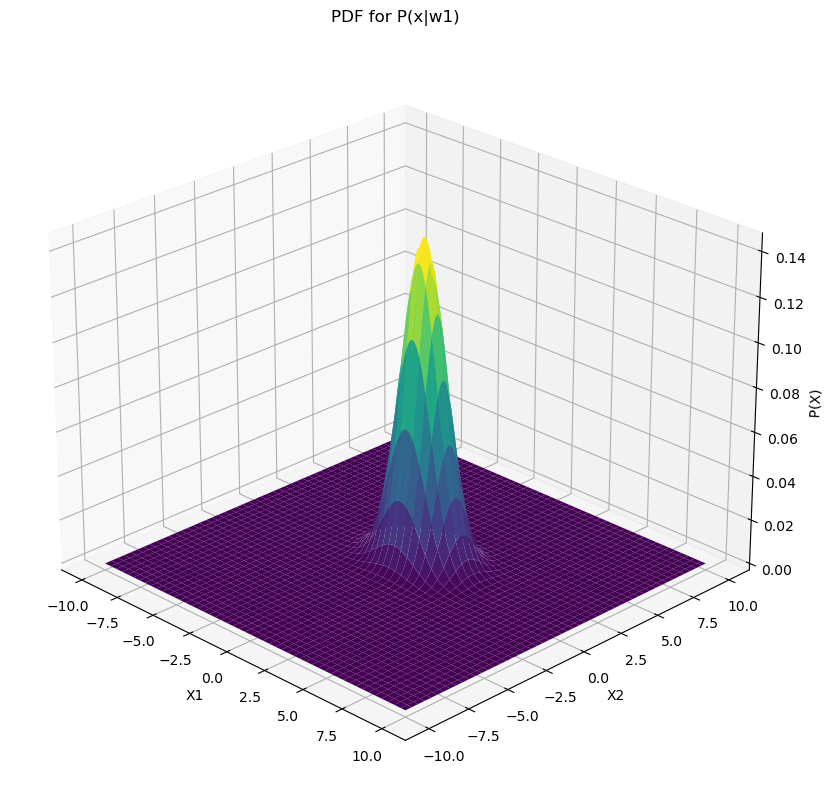

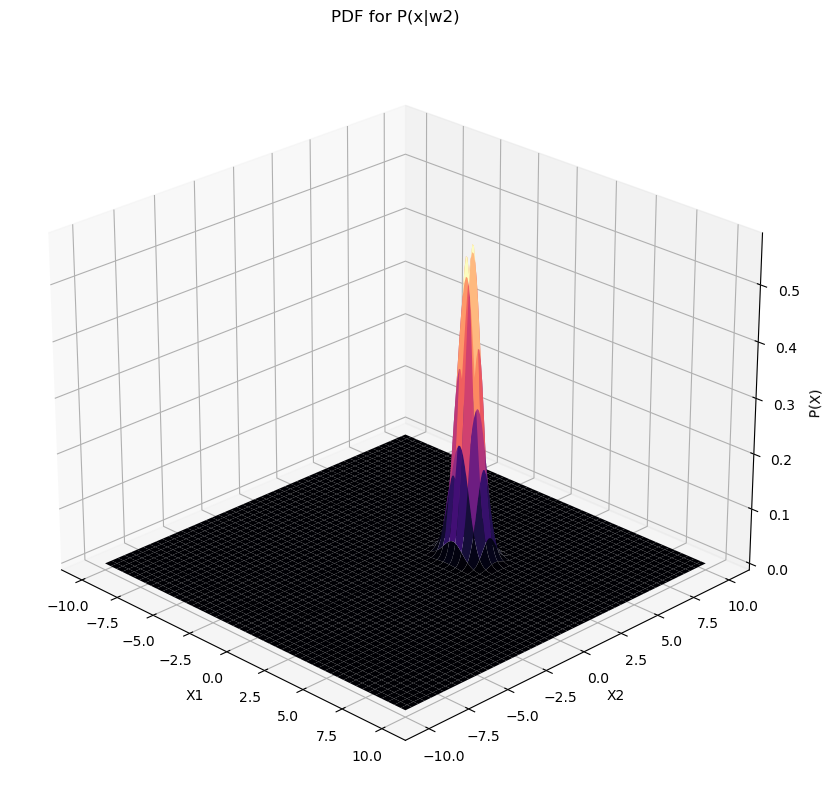

In [143]:

#Calculate probability functions for μ1 and μ2
P_1=multivariate_normal.pdf(data,mean1,cov1)
P_2=multivariate_normal.pdf(data,mean2,cov2)
    
#Create 3D surface plot for P(x|w1)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P_1, cmap='viridis', linewidth=0)
ax.view_init(elev=25, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(x|w1)')
plt.show()

#Create 3D surface plot for P(x|w2)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P_2, cmap='magma', linewidth=0)
ax.view_init(elev=25, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(x|w2)')
plt.show()

As we can see for the P(x|ω2) because the covariance is significantly lower, the probability distribution area is very smalled compared to the pdf of P(x|ω2) from the Part A.
Now, let's plot them in the same diagram with different elevation to better see the maximum point of each pdf.

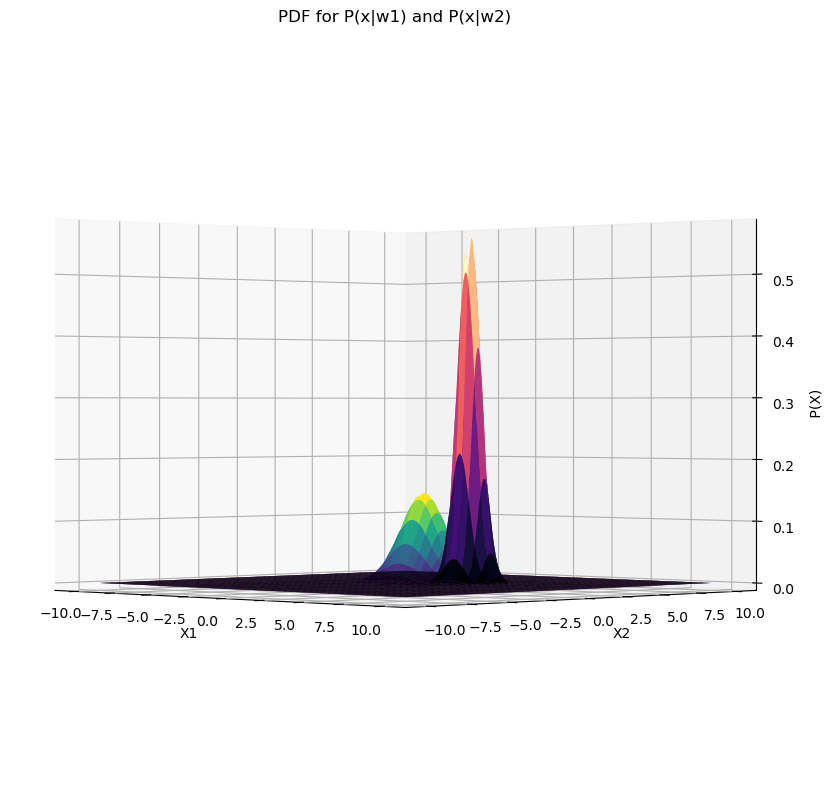

In [144]:
#Create 3D surface plot for P(x|w1) and P(x|w2)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P_1, cmap='viridis', linewidth=0)
ax.plot_surface(X_1, X_2, P_2, cmap='magma', linewidth=0)
ax.view_init(elev=0, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(x|w1) and P(x|w2)')
plt.show()

Repeating Step 2 from Part A

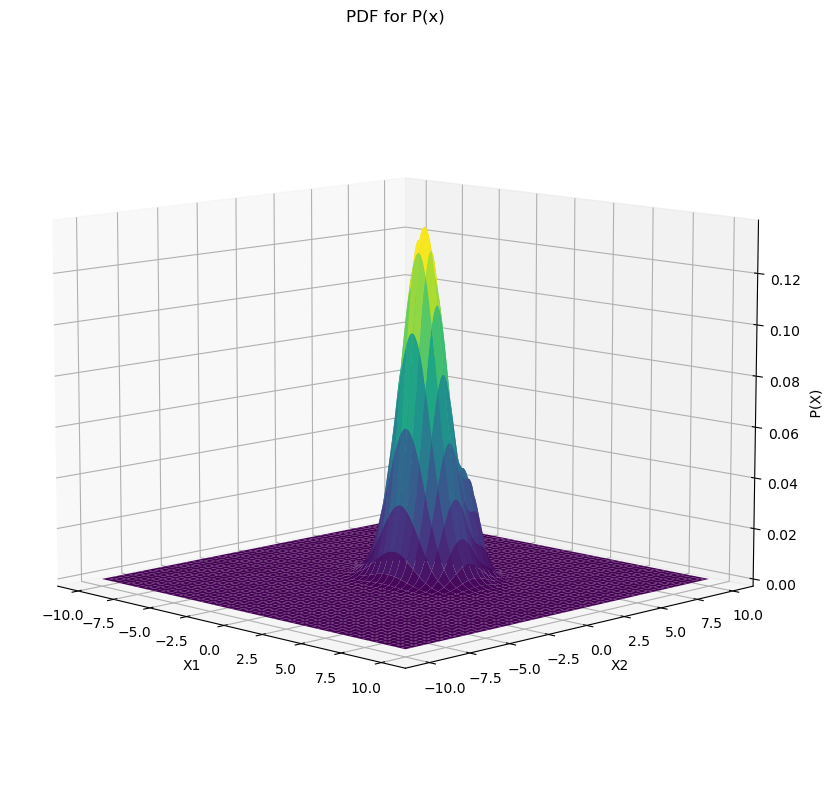

In [145]:
#Calculate total probability distribution from theorem type    
P_total=(P_1*P1_prior)+(P_2*P2_prior)
    
#Create 3D surface plot for P(x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P_total, cmap='viridis', linewidth=0)
ax.view_init(elev=10, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(x)')
plt.show()

As we can see in the above diagram, the total probability distribution includes most of the  P(x|w1) points, because the first class(ω1) a priori possibility is far greater than the second class(ω2).

Repeating Step 3 from Part A

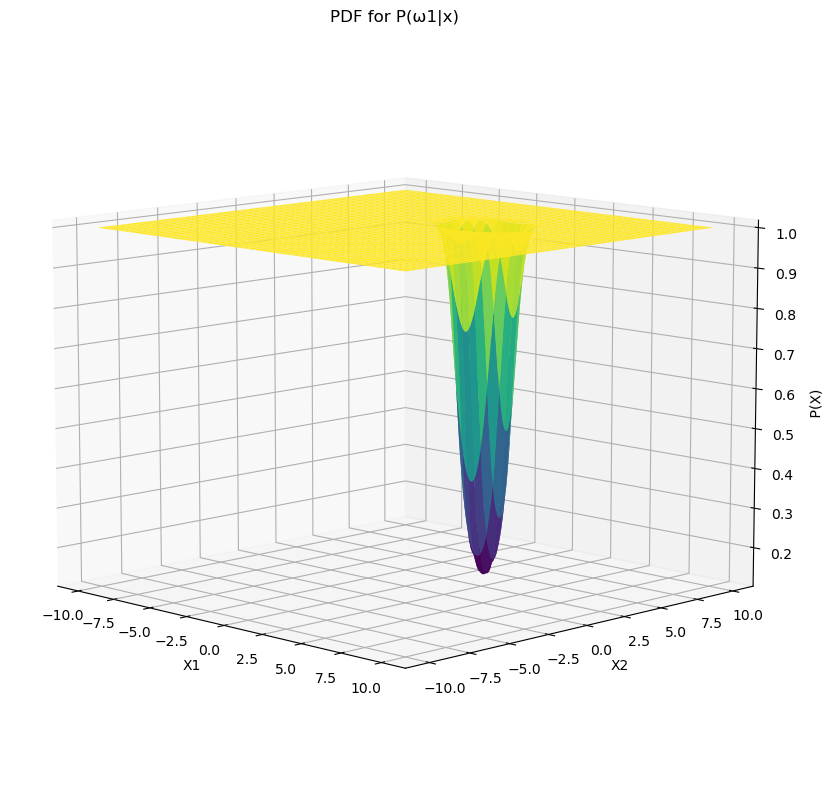

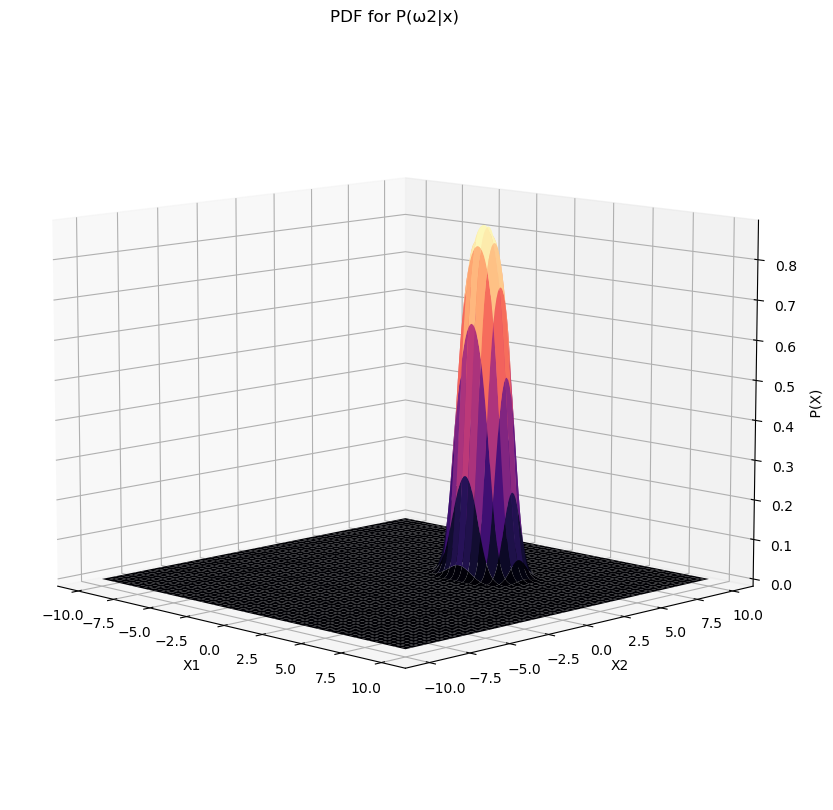

In [146]:
#Calculate posterior probability for both of our classes based on Bayes theorem
P1_posterior=(P_1*P1_prior)/P_total
P2_posterior=(P_2*P2_prior)/P_total

#Create 3D surface plot for P(ω1|x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P1_posterior, cmap='viridis', linewidth=0)
ax.view_init(elev=10, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(ω1|x)')
plt.show()

#Create 3D surface plot for P(ω2|x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P2_posterior, cmap='magma', linewidth=0)
ax.view_init(elev=10, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(ω2|x)')
plt.show()

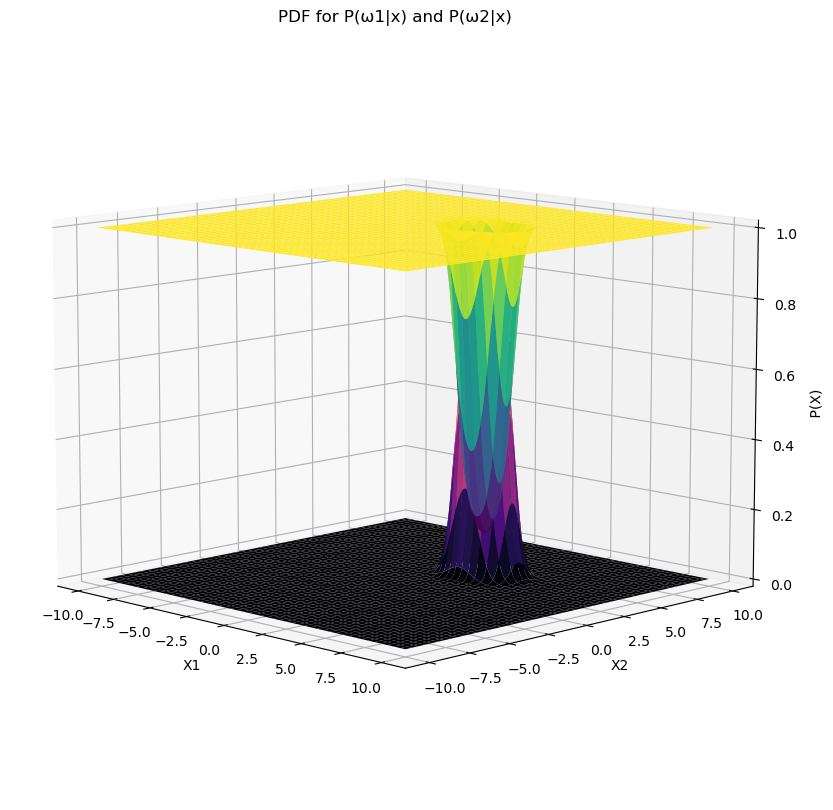

In [147]:
#Now let's plot them together for a better comparison.
#Create 3D surface plot for P(ω1|x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_1, X_2, P1_posterior, cmap='viridis', linewidth=0)
ax.plot_surface(X_1, X_2, P2_posterior, cmap='magma', linewidth=0)
ax.view_init(elev=10, azim=-45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel(' P(X)')
plt.title(label='PDF for P(ω1|x) and P(ω2|x)')
plt.show()

In the above diagram, we can clearly see the point at which the PDF's intersect with each other. Before this point, the a posteriori probability that the variable x belong in class ω1 is far higher than the possibility for it to belong to class ω2, but after the first intersection point we can observe that the opposite case happens, until they intersect again and after that the possibility that the variable x belong in class ω1 is 1 again.

Repeating Step 4 from Part A

In [148]:
errors=[]
array=np.array(data)
for i in array:
    prob1 = (multivariate_normal(mean1, cov1).pdf(i))*P1_prior
    prob2 = (multivariate_normal(mean2, cov2).pdf(i))*P2_prior
    if(prob1<prob2).all():
        errors.append(prob1)
    else:
        errors.append(prob2)
bayes_error=np.sum(errors) / len(errors)
print(bayes_error)

0.02475062500000001


Bayes error  is the lowest possible error  for any classifier of a random outcome and in this particular example, depicts the total error from the wrong guess we took that the vector x belonged in class ω1,while in reality in belonged to class ω2,and vice versa.
We implied the mathematical formula: P(error)=∑i=1,K∫x∈Hi[P(Ci|x)p(x)]dx,where Hi is the region where class i has the lowest posterior probability.

Question 2

When comparing the Bayes error from part B to the one from Part A, we notice that, while they are both comparatively low, the one from Part B is lower from the one from part A, because of the smaller variance.